<a href="https://colab.research.google.com/github/shasso2s/ML/blob/main/cell______SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data=pd.read_csv('Datasets/cell_samples.csv')
data.tail()
data.shape
data.size
data['Class'].value_counts()
data.head(2)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


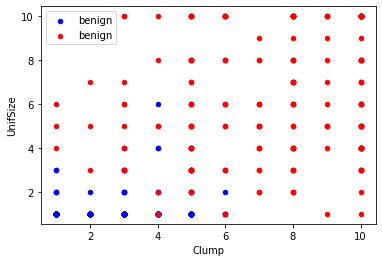

In [ ]:
#Distribution of classes:
malignant =data[data['Class']==4][0:200]
benign=data[data['Class']==2][0:200]


axes= benign.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='benign')
malignant.plot(kind='scatter',x='Clump',y='UnifSize',color='r',label='benign',ax=axes)


In [ ]:
#identifying unwanted rows
data.dtypes
data =data[pd.to_numeric(data['BareNuc'],errors='coerce').notnull()]
data['BareNuc']=data['BareNuc'].astype('int')
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [ ]:
#remove unwanted colums
data.columns
feature_data=data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
#independent variable
x=np.asarray(feature_data)
#'dependent variable'
y=np.asarray(data['Class'])



array([2, 2, 2, 2, 2], dtype=int64)

In [ ]:
#divide the data as train / test dataset
#train(x,y) x is is 2 D array and y is 1 diementional array
#test(x,y)
# if data has 100 dataset (80 rows train  und 20 rows for test)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)
# 546 & 9
X_train.shape
#546
y_train.shape
# 137 & 9
X_test.shape
#137 & 1
y_test.shape


(137,)

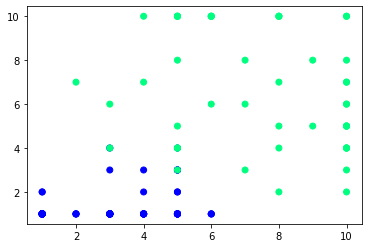

In [ ]:
from sklearn import svm
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='winter')
plt.show()

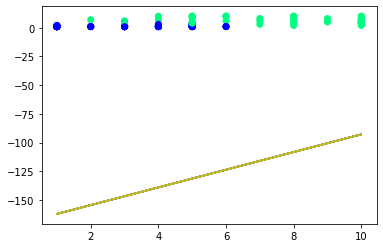

In [ ]:
#modelling (SVM with scikit-learn)
classifier =svm.SVC(kernel='linear',gamma='auto',C=3)
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='winter')
w=classifier.coef_[0]
a=-w[0]/w[1]
#ax=plt.gca()
#xlim=ax.get_xlim()
#xx=np.linspace(xlim[0],xlim[1])
yy=a*X_test-(classifier.intercept_[0]/w[1])
plt.plot(X_test,yy)
plt.show()


In [ ]:
#Evaluation
from sklearn.metrics import classification_report



In [ ]:
print(classification_report(y_test,y_predict))
#precision=(number of halat li prediction dyalhom kanat shiha)/(number of halat li prediction dyalhom kanat shiha+ halat li f asl negative walakin prediction gali positive)
#recall=halat li prediction fiha shih/ number of halat li kan pred fiha positive
#f1=2*precision*recall/precision +recall


              precision    recall  f1-score   support

           2       0.98      0.95      0.97        87
           4       0.92      0.96      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



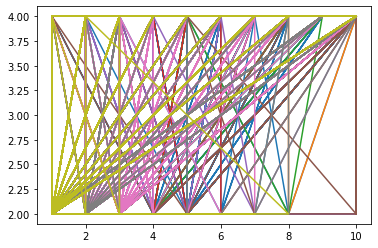